### Aula 03 - Pré Processamento

---



Leitura e formato dos dados do Titanic:

In [1]:
import numpy as np
import pandas as pd

df_dataset = pd.read_csv('data/titanic.data', sep=',', index_col=None)
# a descricao dos dados pode ser obtida em https://www.kaggle.com/c/titanic/data

df_dataset.shape

(891, 12)

Uma primeira impressão sobre os dados e os descritores estatísticos:

In [2]:
display(df_dataset.head(n=5))
display(df_dataset.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A partir dos dados será que existe uma relação entre a classe que estava viajando e quem sobreviveu? Ou o sexo?

In [3]:
df_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [4]:
df_dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


A visualização de dados também pode auxiliar no processo. Verificando a idade:

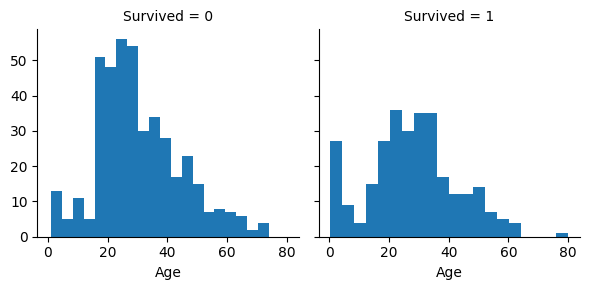

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Analisando graficamente a comparação da classe em que viajavam e se sobreviveram ou não, associado à idade:

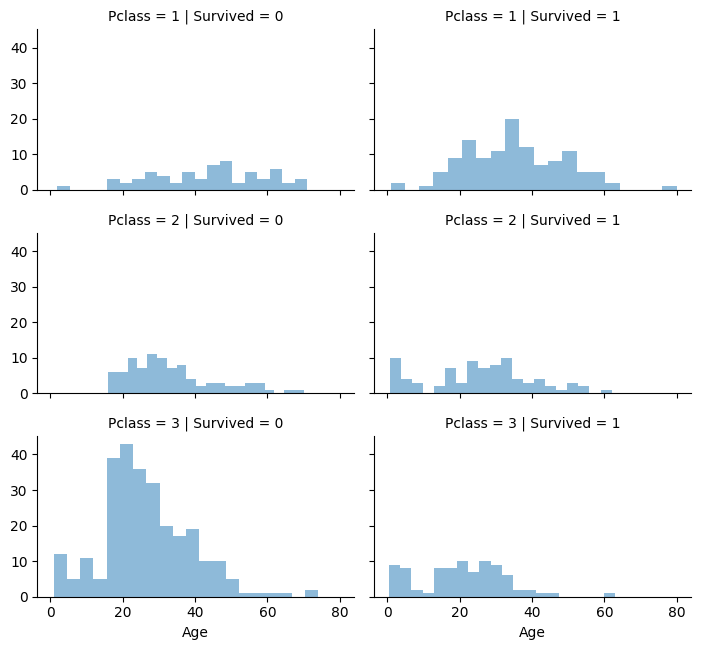

In [6]:
grid = sns.FacetGrid(df_dataset, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

O processo de análise das variáveis pode continuar, o que é chamado de análise exploratória.
Em seguida, observados quais atributos podem ser interessante, a primeira etapa é remover remover os atributos que julgar desnecessários:

In [7]:
df_removed = df_dataset.drop(columns=['Name','Cabin', 'PassengerId', 'Ticket'])
df_removed.shape

(891, 8)

Em seguida, pode-se verificar quais colunas têm valores ausente e se compensa preenchê-las ou removê-las:

In [8]:
df_removed.isna().sum() / df_removed.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

Foi verificado que a idade tem certa importância para sobreviver ou não, portanto seria prejudicial removê-la. A coluna Embarked só poderá ser removida mediante alguns testes. Nesse caso, é importante verificar se é preferível eliminá-la ou se é preferível remover as linhas em que esse valor é ausente. Para preencher a coluna de idade é necessário adotar um valor fixo, ou utilizar apenas um conjunto de dados de treino para estabelecer uma estatística.

In [9]:
# se o desejo for remover as amostras onde idade ou onde embarcou é vazio, poderia ser utilizado o seguinte comando:
df_dropna = df_removed.dropna(subset = ['Age','Embarked'])
df_dropna.shape

(712, 8)

In [11]:
# se o desejo for de preencher com um valor fixo, poderia ser utilizado o seguinte comando:
values = {'Age': 20, 'Embarked': 'Missing'}
df_filled = df_removed.fillna(value=values)
df_filled.shape

(891, 8)

Em seguida, é comum verificar se os valores nulos continuam aparecendo para evitar erros:

In [12]:
df_filled.isna().sum()/df_filled.shape[0]

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

Removidas as combinações de dados faltantes, é necessário tratar os dados em termos de transformação numérica e simbólica para que os métodos de aprendizado possam ser aplicados:

In [13]:
df_filled['Sex'] = df_filled.Sex.map({"female":0, "male":1})

#df_filled.Sex[df_filled.Sex == 'female'] = 0
#df_filled.Sex[df_filled.Sex == 'male'] = 1

df_dummy = pd.get_dummies(df_filled, columns=['Embarked'])

display(df_dummy.columns)
display(df_dummy.shape)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Missing', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

(891, 11)

Em seguida, começa a própria etapa de aprendizagem, com a divisão de dados e finalmente a avaliação do modelo:

In [14]:
display(df_dummy.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,False,True


### Separando a classe dos atributos

In [17]:
X_columns = df_dummy.columns.tolist()
X_columns.remove('Survived')

display(X_columns)

X = df_dummy[X_columns]
y = df_dummy.Survived

display(X.shape)
display(y.shape)

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Missing',
 'Embarked_Q',
 'Embarked_S']

(891, 10)

(891,)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2019)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 10)
(268, 10)
(623,)
(268,)


### Utilizando os vizinhos próximos a partir do Scikit-Learn:

In [1]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [20]:
y_pred = knn.predict(X_test)

In [21]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn import metrics
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.6567164179104478


## Exercício

Avalie três diferentes cenários de pré-processamento (escolha pelo menos duas variáveis). Escolha um valor para "k" do KNN e fixe esse valor para os três cenários de pré-processamento. Aponte o melhor resultado.